In [1]:
from keras.optimizer_v2.gradient_descent import SGD
from keras.optimizer_v2.adam import Adam
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras as k
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

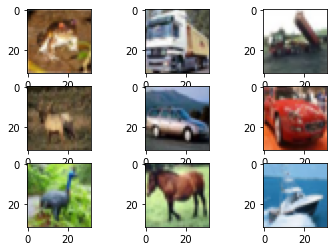

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows, img_cols , channels= 32,32,3
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

In [3]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.3
    )
datagen.fit(x_train)

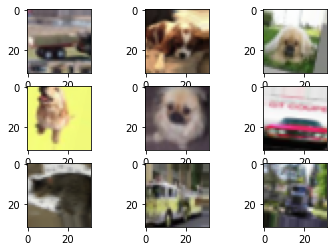

In [4]:
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [5]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
from keras.utils.np_utils import to_categorical

num_classes=10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
def plothist(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

C:\Users\04dar.DESKTOP-46OLM6U\.conda\envs\tf\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\04dar.DESKTOP-46OLM6U\AppData\Local\Temp\ipykernel_7304\3845861553.py:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2=model2.fit_generator(datagen.flow(x_train, y_train, batch_size=128),


Epoch 1/100
390/390 [==============================] - 24s 53ms/step - loss: 1.7526 - accuracy: 0.4305 - val_loss: 1.5276 - val_accuracy: 0.4495
Epoch 2/100
390/390 [==============================] - 20s 52ms/step - loss: 1.2524 - accuracy: 0.5691 - val_loss: 1.1188 - val_accuracy: 0.6163
Epoch 3/100
390/390 [==============================] - 20s 52ms/step - loss: 1.0153 - accuracy: 0.6449 - val_loss: 0.9507 - val_accuracy: 0.6716
Epoch 4/100
390/390 [==============================] - 20s 52ms/step - loss: 0.8855 - accuracy: 0.6880 - val_loss: 0.8420 - val_accuracy: 0.7124
Epoch 5/100
390/390 [==============================] - 20s 52ms/step - loss: 0.8137 - accuracy: 0.7172 - val_loss: 0.8765 - val_accuracy: 0.7100
Epoch 6/100
390/390 [==============================] - 21s 53ms/step - loss: 0.7656 - accuracy: 0.7346 - val_loss: 1.2352 - val_accuracy: 0.6239
Epoch 7/100
390/390 [==============================] - 21s 54ms/step - loss: 0.7094 - accuracy: 0.7536 - val_loss: 0.8677 - val_ac

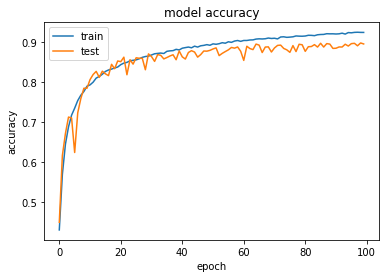

391/391 [==============================] - 3s 7ms/step - loss: 0.1096 - accuracy: 0.9610


[0.10960148274898529, 0.9610199928283691]

In [8]:
reg2=None
num_filters2=32
ac2='relu'
adm2=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt2=adm2
drop_dense2=0.5
drop_conv2=0

model2 = Sequential()

model2.add(Conv2D(num_filters2, (3, 3), activation=ac2, kernel_regularizer=reg2, input_shape=(img_rows, img_cols, channels),padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model2.add(Dropout(drop_conv2))

model2.add(Flatten())
model2.add(Dense(512, activation=ac2,kernel_regularizer=reg2))
model2.add(BatchNormalization())
model2.add(Dropout(drop_dense2))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt2)

history2=model2.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch = len(x_train) / 128, epochs=100, validation_data=(x_test, y_test))

model2.save('actually_model')

plothist(history2)  # 128 batch, 0.001 lr, 512 neurons, no zoom, no convdrop, only 0.1 shift

model2_test_acc=model2.evaluate(x_test,y_test,batch_size=128)
model2_test_acc

model2_train_acc=model2.evaluate(x_train,y_train,batch_size=128)
model2_train_acc

In [9]:
model2.save('here_good')

INFO:tensorflow:Assets written to: here_good\assets


In [1]:
from keras.models import load_model

this = load_model('actually_model')

In [2]:
from keras.preprocessing import image

img_width, img_height = 32, 32
img = image.load_img('imgs/bird.jpg', target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

this.predict(img)

NameError: name 'np' is not defined

In [6]:
import numpy as np

img_width, img_height = 32, 32
img = image.load_img('imgs/newplane.jpg', target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

this.predict(img)

array([[9.9999893e-01, 4.9934984e-10, 1.0630647e-06, 5.5790208e-09,
        1.3729173e-10, 3.5628278e-11, 6.7225687e-12, 8.7850202e-13,
        3.2457217e-09, 9.3742103e-10]], dtype=float32)